In [1]:
%matplotlib notebook

from os import listdir
from os.path import isfile, join
import json
import tensorflow
import pandas
import matplotlib.pyplot as pyplot

In [2]:
def loadLogfiles(path):
    results = []
    files = (f for f in listdir(path) if f.endswith('.json') and isfile(join(path, f)))
    for file in listdir(path):
     filePath = join(path,file)
     if file.endswith('.json') and isfile(filePath):
         with open(filePath) as f:
            data = json.load(f)
            data = {**data, **data['config']}
            i = data['iterations'] - 1
            history = data['history']
            data['val_accuracy'] = history['val_accuracy'][i]
            results.append(data)
    df = pandas.DataFrame(results)
    df.set_index(['depth'], drop=False, inplace=True)
    df.sort_index(inplace=True)
    return df

In [45]:
b50 = loadLogfiles('/home/ctripp/log/mnist/50/')
b100 = loadLogfiles('/home/ctripp/log/mnist/100/')
b150 = loadLogfiles('/home/ctripp/log/mnist/150/')
b200 = loadLogfiles('/home/ctripp/log/mnist/200/')
datasets = [b50, b100, b150, b200]
legend = ['50 nodes', '100 nodes', '150 nodes', '200 nodes']
b50

,config,endpoint,history,iterations,loss,numClasses,numFeatures,numInputs,numObservations,numOutputs,...,val_loss,activation,depth,earlyStopping,logPath,name,runConfig,runName,width,val_accuracy
depth,,,,,,,,,,,,,,,,,,,,,
2,"{'activation': 'relu', 'depth': 2, 'earlyStopp...",categorical,"{'accuracy': [0.8528571724891663, 0.9265893101...",25,0.036880,10.0,784,784,70000,10,...,0.107531,relu,2,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_50_d_2,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_50_d_2_1606...,50,0.970000
3,"{'activation': 'relu', 'depth': 3, 'earlyStopp...",categorical,"{'accuracy': [0.786392867565155, 0.91699999570...",20,0.086893,10.0,784,784,70000,10,...,0.147255,relu,3,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_25_d_3,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_25_d_3_1606...,25,0.956714
4,"{'activation': 'relu', 'depth': 4, 'earlyStopp...",categorical,"{'accuracy': [0.606374979019165, 0.89960712194...",29,0.095145,10.0,784,784,70000,10,...,0.166102,relu,4,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_17_d_4,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_17_d_4_1606...,17,0.953929
5,"{'activation': 'relu', 'depth': 5, 'earlyStopp...",categorical,"{'accuracy': [0.48566070199012756, 0.885714292...",28,0.136418,10.0,784,784,70000,10,...,0.189780,relu,5,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_12_d_5,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_12_d_5_1606...,12,0.946786
6,"{'activation': 'relu', 'depth': 6, 'earlyStopp...",categorical,"{'accuracy': [0.5507321357727051, 0.8452321290...",44,0.155326,10.0,784,784,70000,10,...,0.215475,relu,6,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_10_d_6,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_10_d_6_1606...,10,0.940857
7,"{'activation': 'relu', 'depth': 7, 'earlyStopp...",categorical,"{'accuracy': [0.3986964225769043, 0.7069464325...",41,0.230563,10.0,784,784,70000,10,...,0.275728,relu,7,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_8_d_7,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_8_d_7_16068...,8,0.922929
8,"{'activation': 'relu', 'depth': 8, 'earlyStopp...",categorical,"{'accuracy': [0.3053571283817291, 0.5244821310...",64,0.344559,10.0,784,784,70000,10,...,0.394953,relu,8,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_7_d_8,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_7_d_8_16068...,7,0.892143
9,"{'activation': 'relu', 'depth': 9, 'earlyStopp...",categorical,"{'accuracy': [0.21537500619888306, 0.456214278...",70,0.506446,10.0,784,784,70000,10,...,0.560910,relu,9,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_6_d_9,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_6_d_9_16068...,6,0.844214
10,"{'activation': 'relu', 'depth': 10, 'earlyStop...",categorical,"{'accuracy': [0.19171428680419922, 0.292214274...",179,0.416208,10.0,784,784,70000,10,...,0.490620,relu,10,"{'baseline': None, 'min_delta': 0, 'mode': 'mi...",/home/ctripp/log,classification_categorical_mnist_w_6_d_10,"{'batch_size': 256, 'epochs': 10000, 'shuffle'...",classification_categorical_mnist_w_6_d_10_1606...,6,0.866857


In [75]:
def plotEach(
    datasets,
    xlabel,
    ylabel,
    xFunction=lambda dataset:dataset['depth'], 
    yFunction=lambda dataset:dataset['depth'],
    codes = ['rx--','g2--','b+--','k1--'],
    plotFunction=lambda x, y, code : pyplot.semilogy(x,y,code),
    legend=None,
    show=True):
    pyplot.figure()
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    for i, dataset in enumerate(datasets):
        plotFunction(xFunction(dataset), yFunction(dataset), codes[i])
    if legend is not None:
        pyplot.legend(legend)
    if show:
        pyplot.show()
        
        

<IPython.core.display.Javascript object>


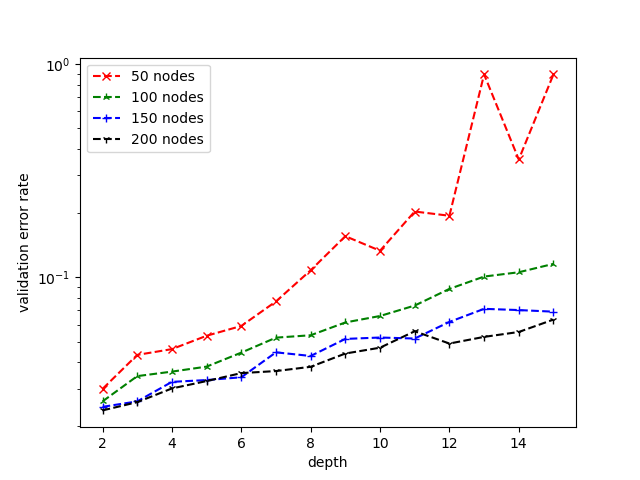

In [76]:
plotEach(datasets, 
         'depth', 
         'validation error rate',
         yFunction=lambda dataset: 1-dataset['val_accuracy'], 
         legend=legend)


<IPython.core.display.Javascript object>


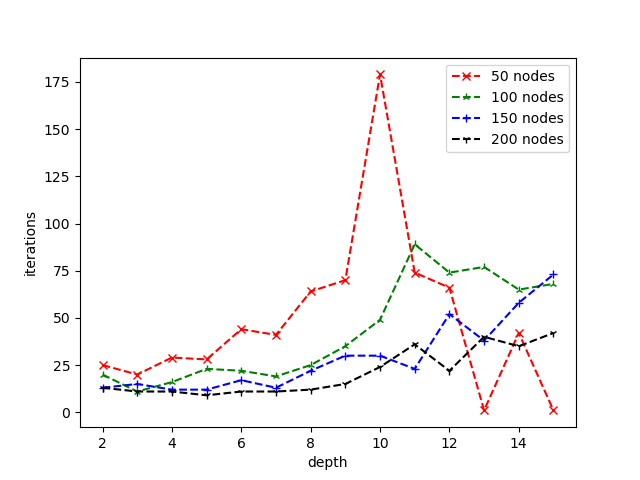

In [77]:
plotEach(datasets, 
         'depth',
         'iterations',
         plotFunction=lambda x, y, code: pyplot.plot(x,y,code), 
         yFunction=lambda dataset: dataset['iterations'], 
         legend=legend)


<IPython.core.display.Javascript object>


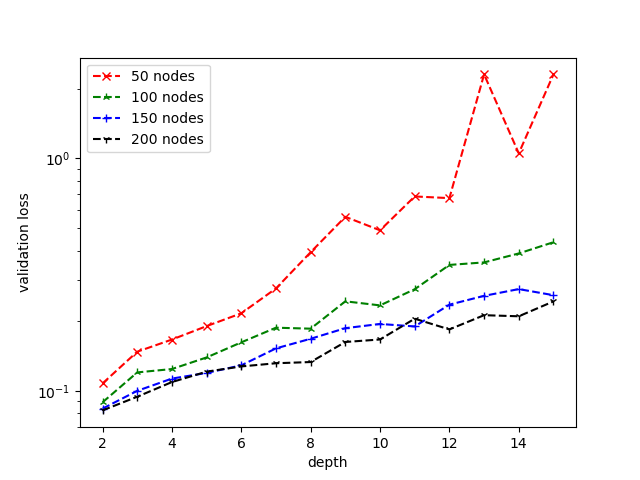

In [78]:
plotEach(datasets, 
         'depth',
         'validation loss',
         yFunction=lambda dataset: dataset['val_loss'], 
         legend=legend)


<IPython.core.display.Javascript object>


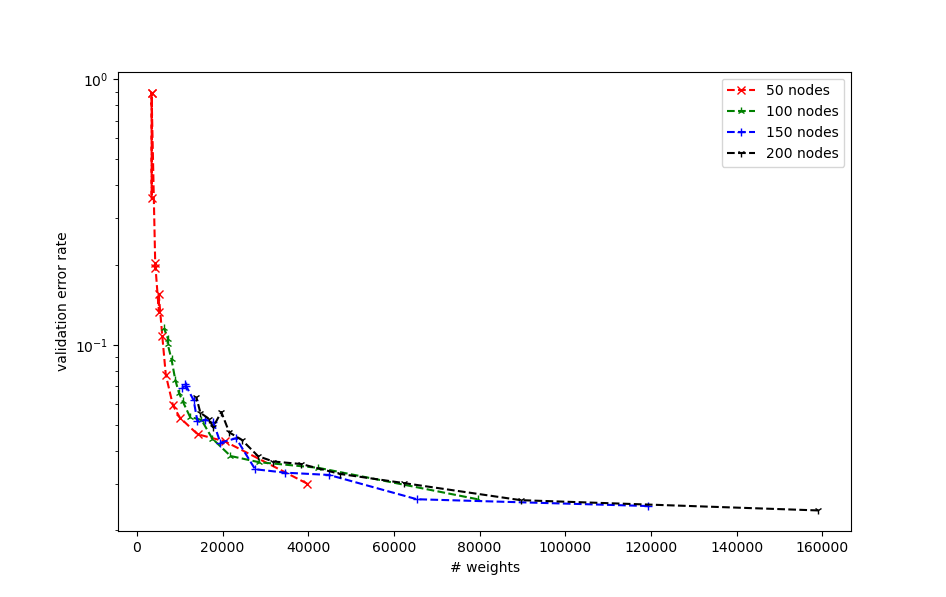

In [123]:
plotEach(datasets, 
         '# weights',
         'validation error rate',
         xFunction=lambda dataset: dataset['numWeights'],
         yFunction=lambda dataset: 1-dataset['val_accuracy'], 
         legend=legend)


<IPython.core.display.Javascript object>


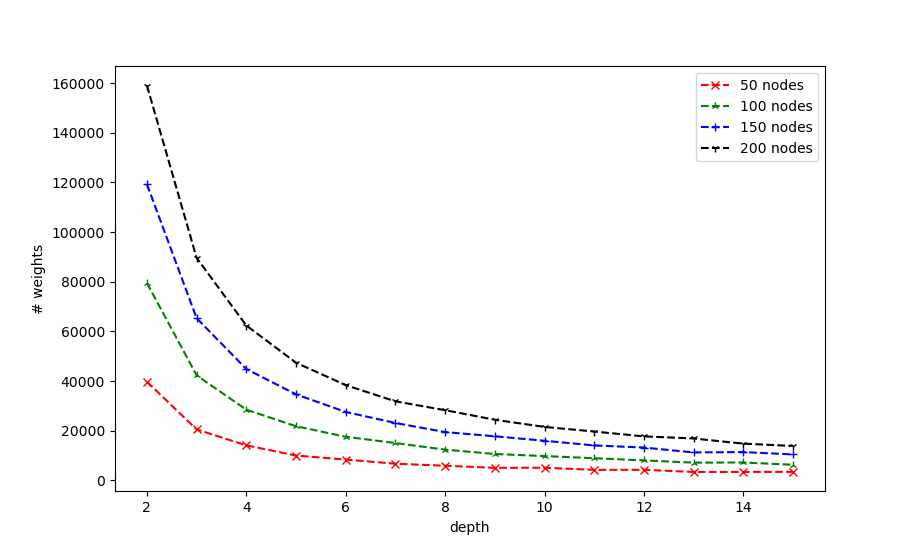

<IPython.core.display.Javascript object>


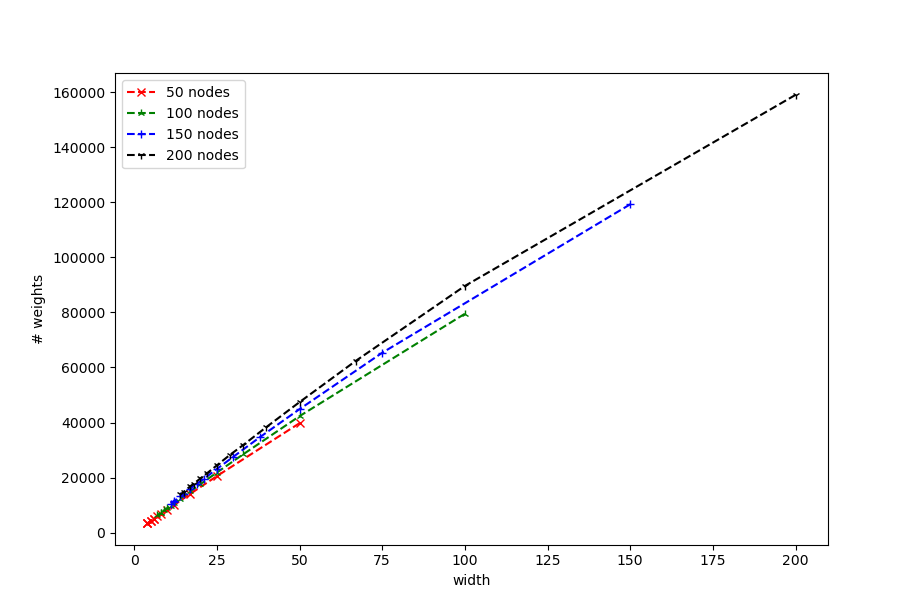

In [84]:
plotEach(datasets, 
         'depth',
         '# weights',
         plotFunction=lambda x, y, code: pyplot.plot(x,y,code), 
         xFunction=lambda dataset: dataset['depth'],
         yFunction=lambda dataset: dataset['numWeights'], 
         legend=legend)

plotEach(datasets, 
         'width',
         '# weights',
         plotFunction=lambda x, y, code: pyplot.plot(x,y,code), 
         xFunction=lambda dataset: dataset['width'],
         yFunction=lambda dataset: dataset['numWeights'], 
         legend=legend)

<IPython.core.display.Javascript object>


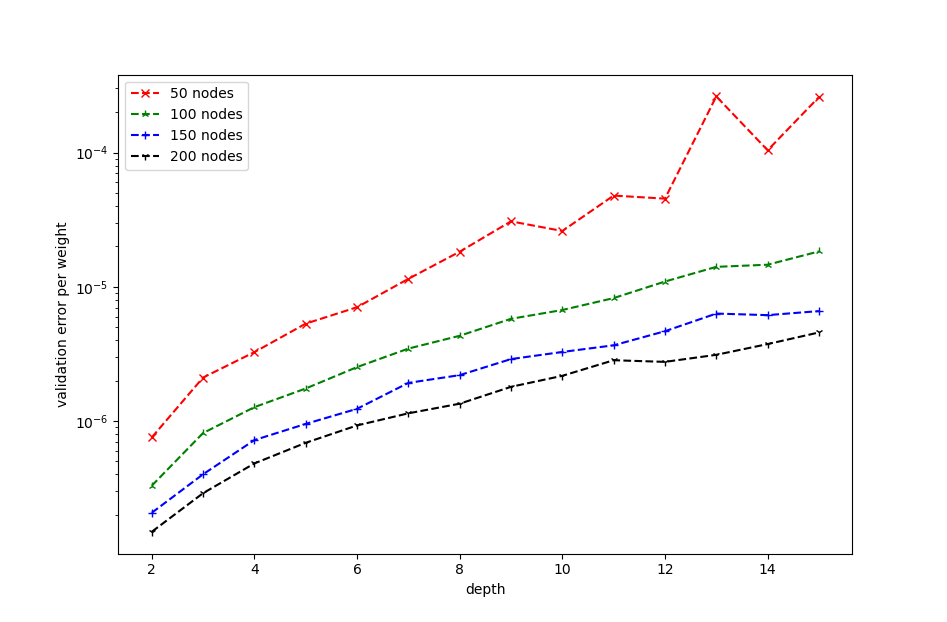

<IPython.core.display.Javascript object>


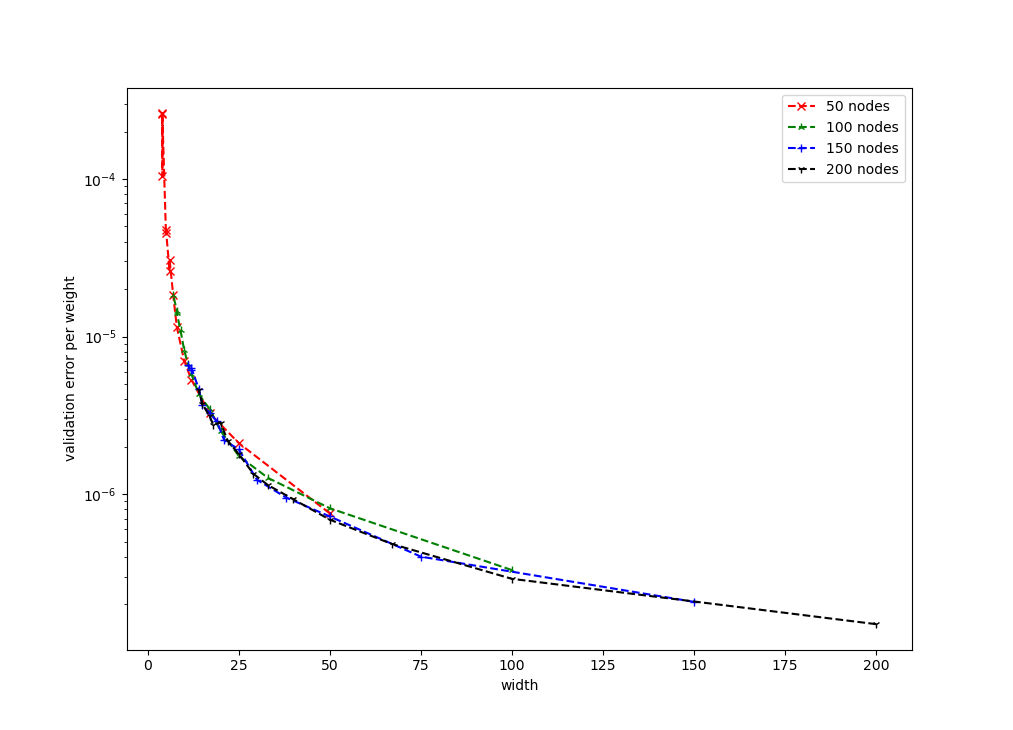

In [88]:
plotEach(datasets, 
         'depth',
         'validation error per weight',
         xFunction=lambda dataset: dataset['depth'],
         yFunction=lambda dataset: (1-dataset['val_accuracy'])/dataset['numWeights'], 
         legend=legend)

plotEach(datasets, 
         'width',
         'validation error per weight',
#          plotFunction=lambda x, y, code: pyplot.plot(x,y,code), 
         xFunction=lambda dataset: dataset['width'],
         yFunction=lambda dataset: (1-dataset['val_accuracy'])/dataset['numWeights'], 
         legend=legend)



In [125]:
b50['numWeights'] - (((b50['numInputs']+1) * b50['width']) + (b50['depth']-2).clip(lower=0)*(1+b50['width'])*b50['width']+ (b50['width'] + 1) * b50['numOutputs'])
# b50['numWeights']

depth
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

<IPython.core.display.Javascript object>


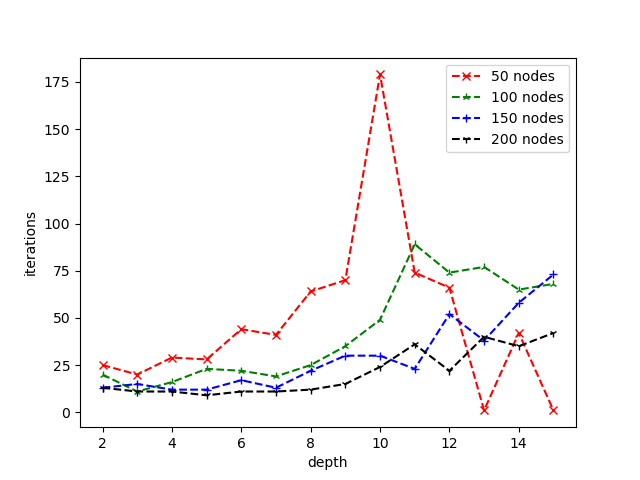